라이브러리 추가

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline   

input 파일 경로 설정

In [32]:
filename = "/content/resnet50.txt"
f = open(filename,'r')  

데이터 파싱 & 그래프에 나타내기

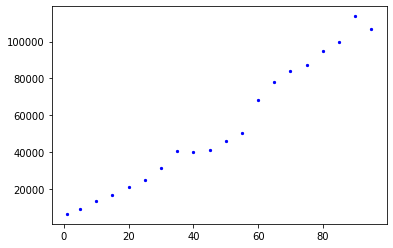

In [33]:
x = []
y = []

while True:
    line = f.readline()
    if line == "":
        break
    line_num = line.split(' ')
    x.append(int(line_num[0]))
    y.append(float(line_num[1]))

f.close()

x = np.array(x).reshape(-1,1)
y = np.array(y)

plt.scatter(x, y, s=5, color="blue")
plt.show()

모델 학습 & 예측 그래프 작성

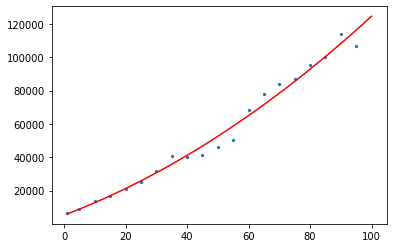

In [34]:
model_lr = make_pipeline(PolynomialFeatures(degree=2, include_bias=False),LinearRegression())
poly = model_lr.fit(x, y)
xx = np.linspace(1, 100, 100)
y_pred = model_lr.predict(xx[:, np.newaxis])
plt.plot(xx, y_pred, color="red")
plt.scatter(x, y, s=5)

값 예측 함수

In [35]:
def predict(batch_size):
    compute_time = poly.predict([[int(batch_size)]])
    return int(compute_time[0])

compute time 예측

In [36]:
predict(77)

88388

In [37]:
yy = []
for i in range(100):
    yy.append(xx.tolist()[i]/y_pred.tolist()[i]*1000000)
yy = np.array(yy)

max batch size : 33
max request rate : 979.2094892245971


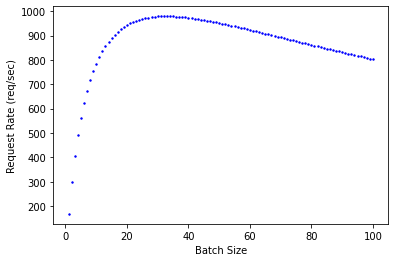

In [53]:
print("max batch size : " + str(yy.tolist().index(yy.max())+1))
print("max request rate : " + str(yy.max()))
plt.xlabel("Batch Size")
plt.ylabel("Request Rate (req/sec)")
plt.scatter(xx, yy, color="blue", s=2)

request rate -> batch size 변환 표

In [55]:
filename = "/content/resnet50_batch.txt"
f = open(filename,'w')  

In [56]:
for y in yy:
    f.write(str(y)+"\n")
    if y == yy.max():
        break
f.close()